In [46]:
# https://www.kaggle.com/hb20007/gender-classification/home
import pandas as pd

In [47]:
train = pd.read_csv('data/gender_classification.csv');

In [48]:
train.head(10)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
5,Warm,Jazz/Blues,Doesn't drink,Fanta,F
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
7,Warm,Pop,Whiskey,Fanta,F
8,Warm,Rock,Other,7UP/Sprite,F
9,Neutral,Pop,Wine,Coca Cola/Pepsi,F


In [49]:
train.shape

(66, 5)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
Favorite Color          66 non-null object
Favorite Music Genre    66 non-null object
Favorite Beverage       66 non-null object
Favorite Soft Drink     66 non-null object
Gender                  66 non-null object
dtypes: object(5)
memory usage: 2.7+ KB


In [51]:
train["Favorite Color"].isnull().sum()

0

In [52]:
def bar_chart(feature):
    male = train[train['Gender']=='M'][feature].value_counts()
    female = train[train['Gender']=='F'][feature].value_counts()
    df = pd.DataFrame([male,female])
    df.index = ['Male','Female']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

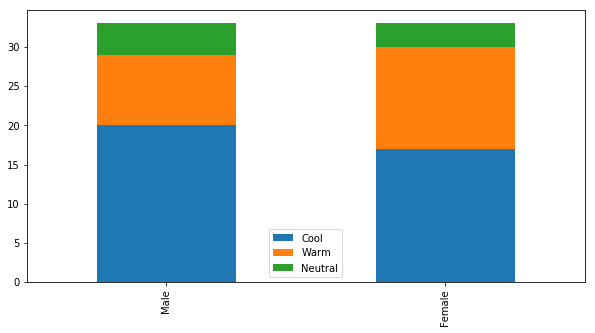

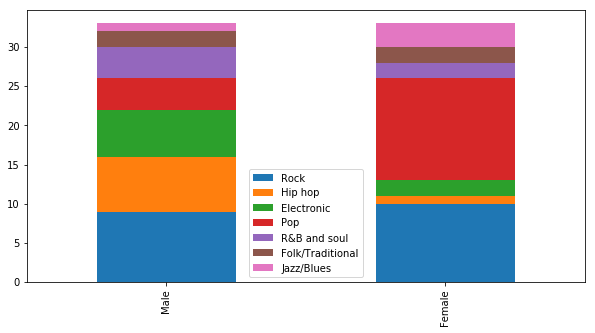

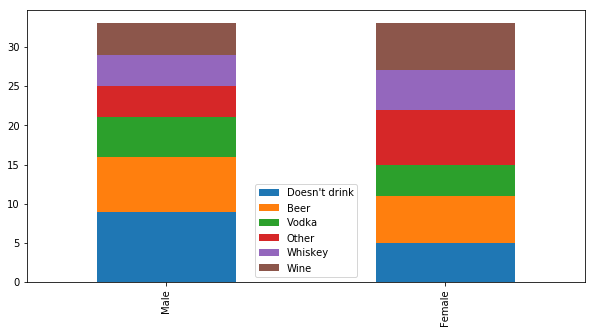

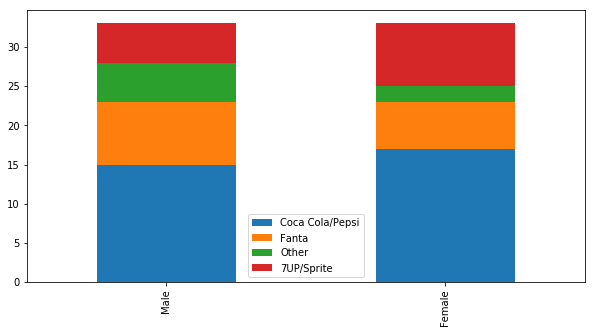

In [53]:
bar_chart('Favorite Color')
bar_chart('Favorite Music Genre')
bar_chart('Favorite Beverage')
bar_chart('Favorite Soft Drink')

In [54]:
train["Favorite Color"].value_counts()
color_mapping = {"Cool": 0, "Warm": 1, "Neutral": 2}
for dataset in [train]:
    dataset['color'] = dataset['Favorite Color'].map(color_mapping)

In [55]:
train['Favorite Beverage'].value_counts()
beverage_mapping = {"Doesn't drink": 0, "Beer": 1, "Other": 2, "Wine": 3, "Whiskey": 4, "Vodka": 5}
for dataset in [train]:
    dataset['beverage'] = dataset['Favorite Beverage'].map(beverage_mapping)
    

In [56]:
train['Favorite Music Genre'].value_counts()
music_mapping = {"Rock": 0, "Pop": 1, "Electronic": 2, "Hip hop": 3, "R&B and soul": 4, "Jazz/Blues": 5, "Folk/Traditional": 6}
for dataset in [train]:
    dataset['music'] = dataset['Favorite Music Genre'].map(music_mapping)
    

In [57]:
train['Favorite Soft Drink'].value_counts()
softdrink_mapping = {"Coca Cola/Pepsi": 0, "Fanta": 1, "7UP/Sprite": 2, "Other": 3}
for dataset in [train]:
    dataset['softdrink'] = dataset['Favorite Soft Drink'].map(softdrink_mapping)
    

In [58]:
train['Gender'].value_counts()
gender_mapping = {"F": 0, "M": 1}
for dataset in [train]:
    dataset['gender'] = dataset['Gender'].map(gender_mapping)

In [59]:
features_drop = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink', 'Gender']
train = train.drop(features_drop, axis=1)

In [60]:
train.head(20)

,color,beverage,music,softdrink,gender
0,0,5,0,2,0
1,2,5,3,0,0
2,1,3,0,0,0
3,1,4,6,1,0
4,0,5,0,0,0
5,1,0,5,1,0
6,0,1,1,0,0
7,1,4,1,1,0
8,1,2,0,2,0
9,2,3,1,0,0


In [38]:
import tensorflow as tf

In [69]:
x_data = train.values[:, :-1]
y_data = train.values[:, [-1]]

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [70]:

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [80]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [81]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [91]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: [[0, 5, 3, 2]], Y: [[1]]})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
    
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: [[0, 5, 3, 2]], Y: [[1]]})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.337684
200 0.68704826
400 0.6798302
600 0.6786334
800 0.6784008
1000 0.6783554
1200 0.67834663
1400 0.6783449
1600 0.67834455
1800 0.6783445
2000 0.6783445

Hypothesis:  [[0.5198951]] 
Correct (Y):  [[1.]] 
Accuracy:  1.0
